# Heart Disease Dataset
### Entendendo o contexto do Dataset
* Este conjunto de dados data de 1988 e consiste em quatro bancos de dados: Cleveland, Hungria, Suíça e Long Beach V. Ele contém 76 atributos, incluindo o atributo previsto, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. O campo "alvo" refere-se à presença de cardiopatia no paciente. É valor inteiro 0 = sem doença e 1 = com doença.
### Visualizando uma previa do conjunto de dados
* age: The person´s age in years
* sex: The person´s sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value1: typical angina, Value2: atypical angina, Value3: non- anginal pain, Value4: asumptomatic)
* trestbps: The person´s resting blood pressure (MM Hg on dmission to the hospital)
* chol: The person´s cholesterol measurement in mg/dl
* fbs: The person´s fastin blood sugar(>129 mg/dl, 1 = true; 0 = false)
* restecg: Resting eletrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or -definite left ventricular hypertropgy by estes' critea)
* thalach: The person´s maximum heart rate achieved
* exang: Exercise induced angina (1= yes, 0= no)
* oldpeak: ST depression induced by exercise relative to rest (ST' relates to positions on the ECG plot. See more here)
* slope: The slope of the peak exercise ST segment (Value1: upsloping, Value2: flat, Value3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder calied thaiassemia (3= normal: 6= fixed defect: 7= reversable defect) 
* target: Heart disease (0= not, 1= yes)
##### Link de estudo sobre limpreza de duplicidade dos dados
* https://towardsdatascience.com/2-types-of-duplicate-features-in-machine-learning-2931de6c949b

In [1]:
# Importo todas as bibliotecas de uma vez para não precisar fazer importação no meio do modelo

# Primeiro as padrões
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Seguindo com as nescessarias para o modelo de mch. learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Vamos ler o arquivo e visualizar como esta o dataset

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# Observo que o dataset parece limpo mas vou visualizar com mais no detalhe, vamos nessa... 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Por via de duvidas verifico se existem campos nulos (Null)

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### Aqui percebo que nao faltam linhas e tambem ja indentifiquei o tipo (Dtype) de cada coluna com df.info(), e com certeza não existem valores nulos

In [5]:
# Agora verifico se tem linhas repetidas

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [6]:
df.duplicated().sum()

723

##### Sim existem duplicatas, então aplico a soma para enteder quantos valores estão duplicados são 723.
###### Nesse caso eu vou tirar as duplicatas, para não causar "problemas na acuracia do modelo", (Dificilmente nesse caso (Nesse contexto) vamos ter pacientes que compartilham dos mesmos dados tendo 13 caracteristicas identicas). Exitem diversas discussoes sobre tirar ou não duplicatas eu vou optar por tirar.

In [7]:
# Tirando as duplicatas e criando um novo DataFrame = hd com a limpeza das duplicatas 

hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


##### Com a limpeza temos agora 302 linhas e mantivemos as 14 colunas

In [8]:
# Vou visualizar agora a composição mais estatistica do conjunto de dados, então aplico o describe()

hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Visualizando o dataframe acima percebi que temos alguns outliers onde temos um salto grande dos 75% para o maximo em algumas colunas, mais para frente vou tratalos/remove-los

<Axes: >

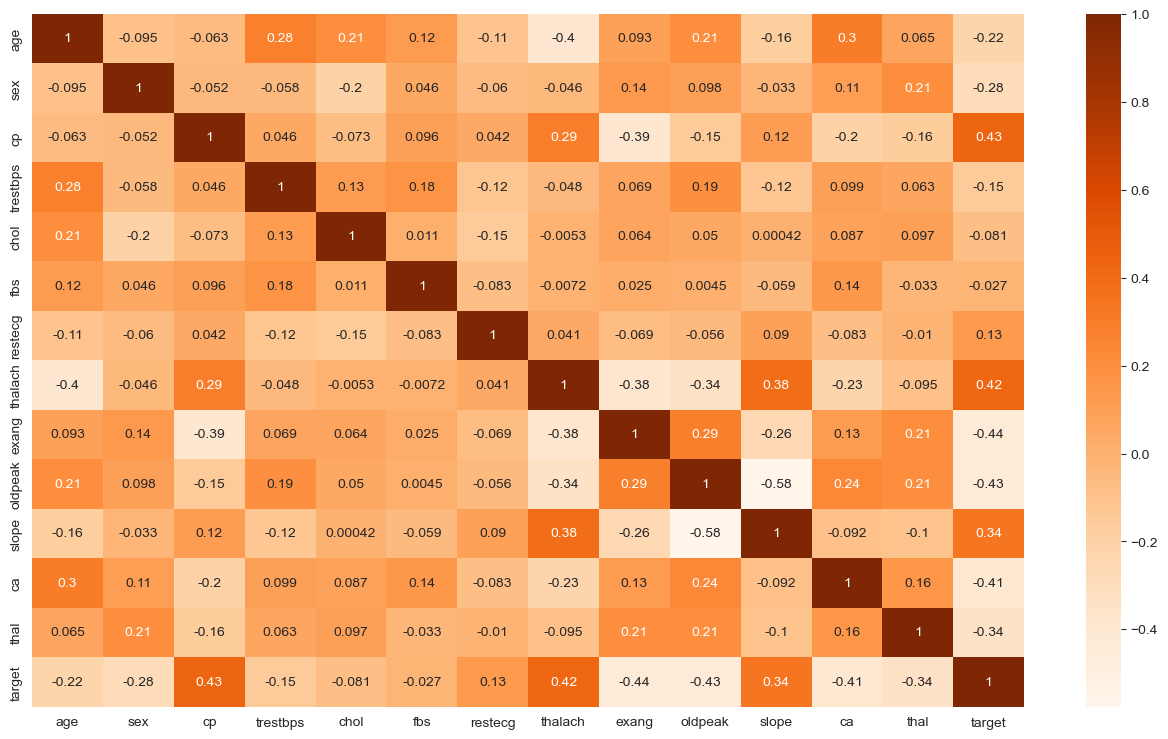

In [9]:
# Vou plotar um grafico agora para enteder a proximidade das colunas em relação ao target

plt.figure(figsize = (16,9))
sns.heatmap(hd.corr(), annot = True, cmap = 'Oranges')

In [10]:
# Até consegui indentificar e resolver alguns pontos 
# Feito o grafico e tendo entendido a proximidade vou separar os dados a partir de agora

In [11]:
# Visualizo o dataset novamente apenas 1 coluna mesmo 

hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [12]:
# Agora confirmo as variaveis por coluna descrita na previa la em cima, visulizando numericas e categoricas

for c in hd.columns:
    print (f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [13]:
# Separo elas criando uma lista para cada categoria

categoricas = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numericas = ['age','trestbps','chol','thalach','oldpeak']

## Vou criar 2 tipos de graficos considerando a separação por categoria que foi feita acima.
##### observe o titulo para indentificar a que categoria o grafico pertence
##### È importante avaliar a previa aprensentada no inicio do notebook para entender a relação entre cada tipo de categoria e o target 

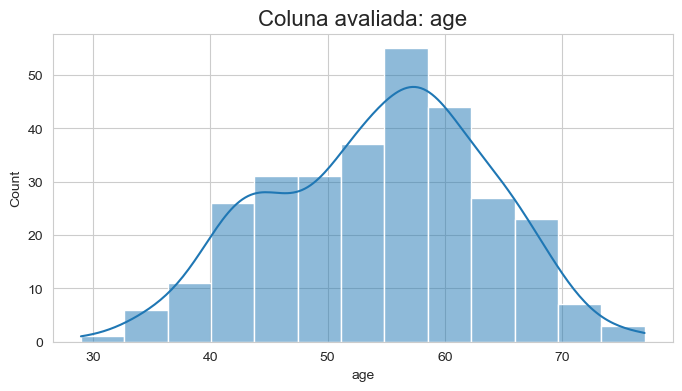

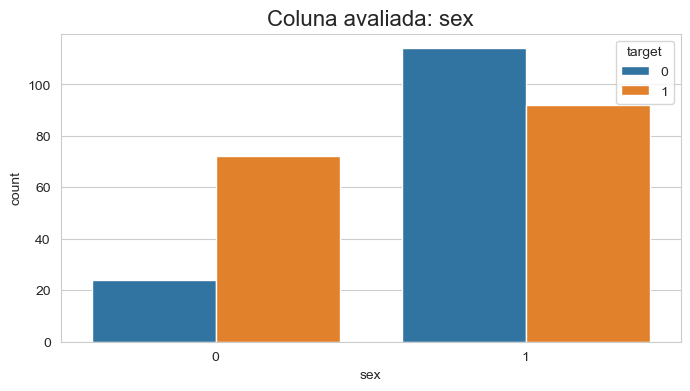

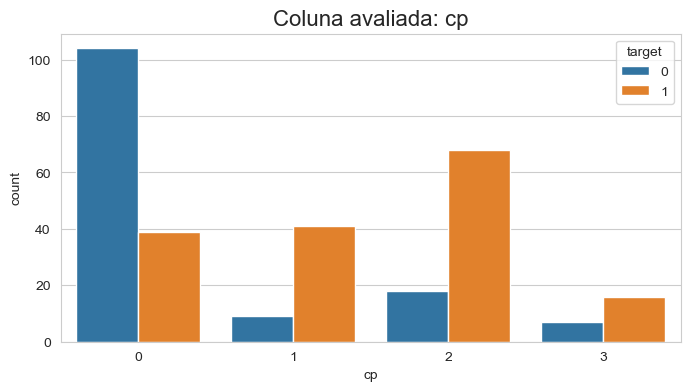

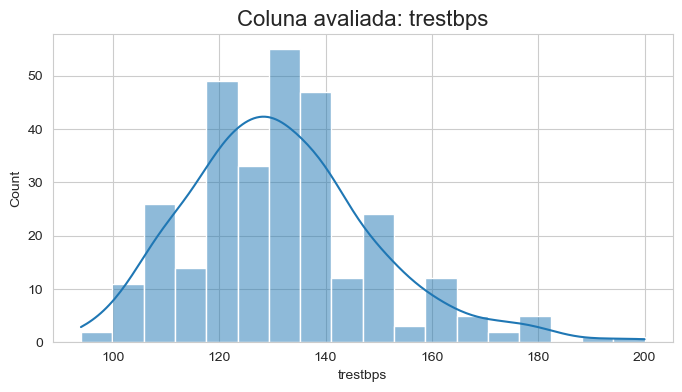

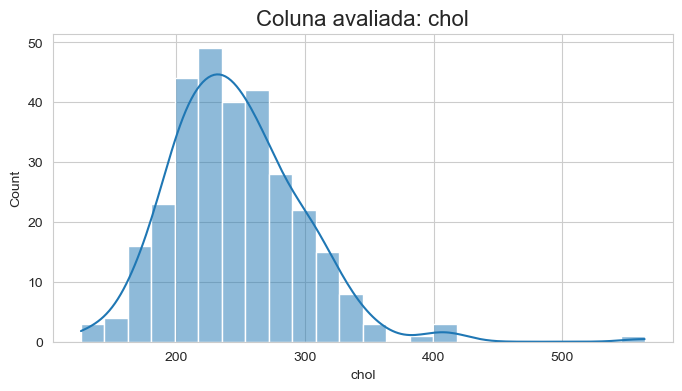

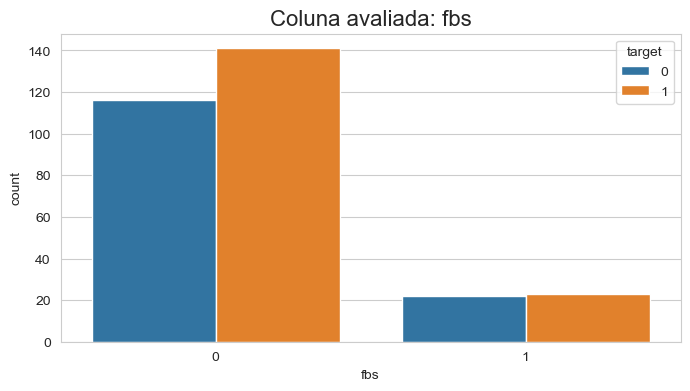

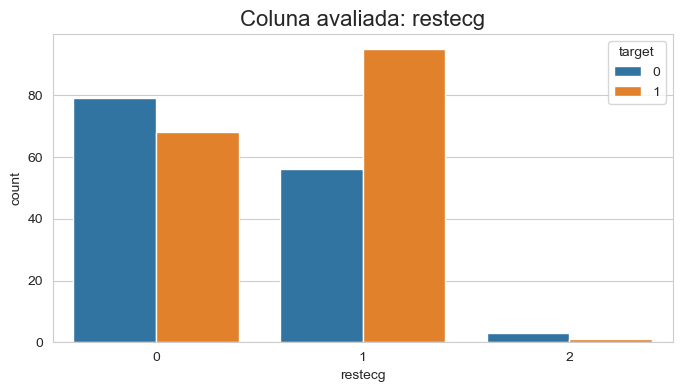

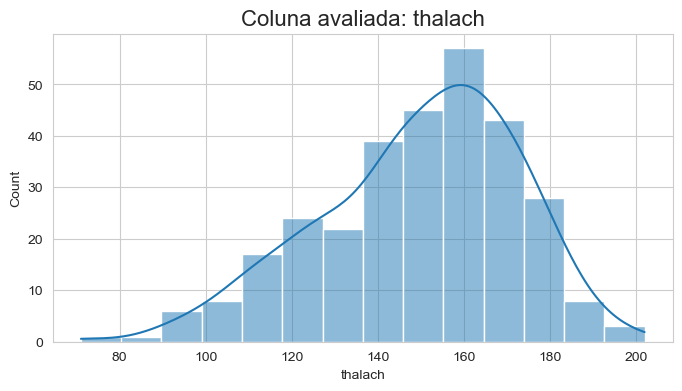

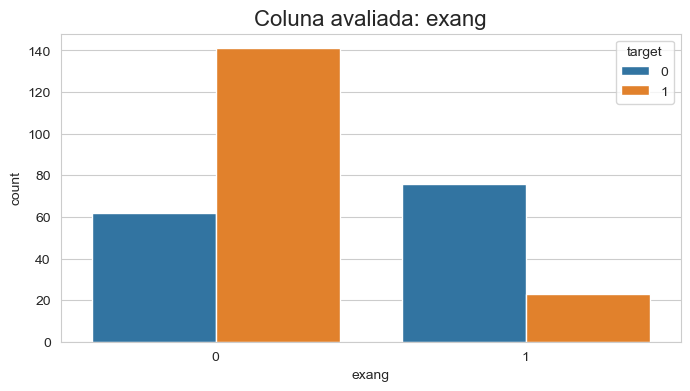

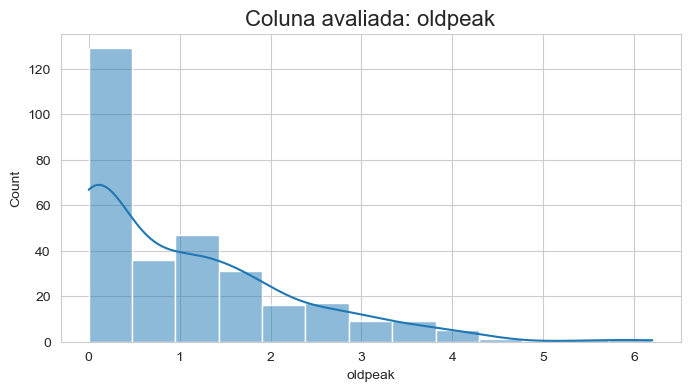

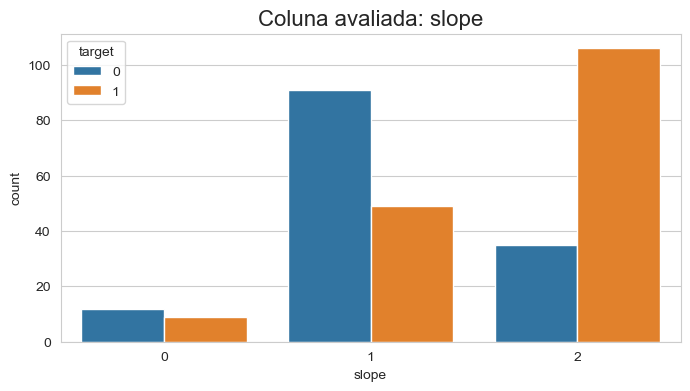

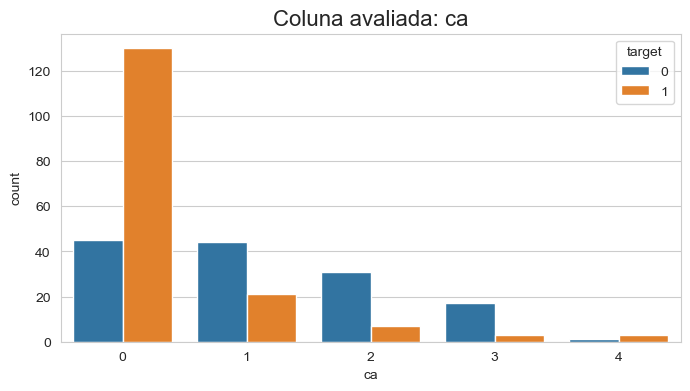

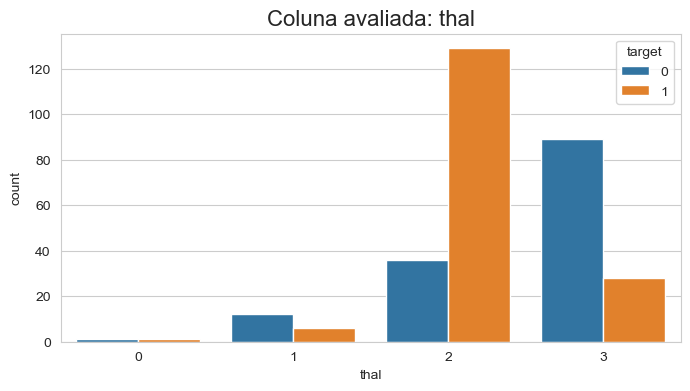

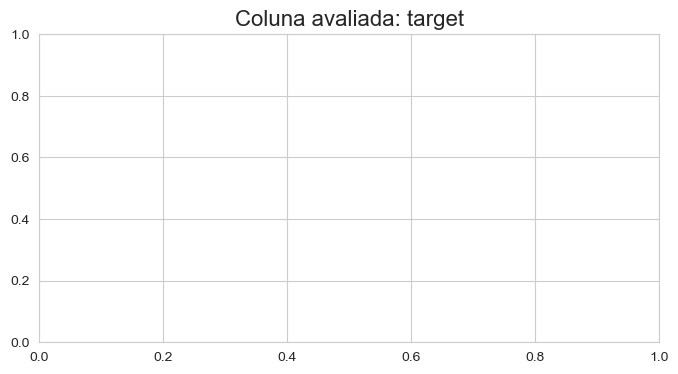

In [14]:
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    if c in categoricas:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)

###### Tendo visualizado e entendido determinadas correlações vou partir para a limpeza daqueles outliers que comemtei la em cima

<Axes: >

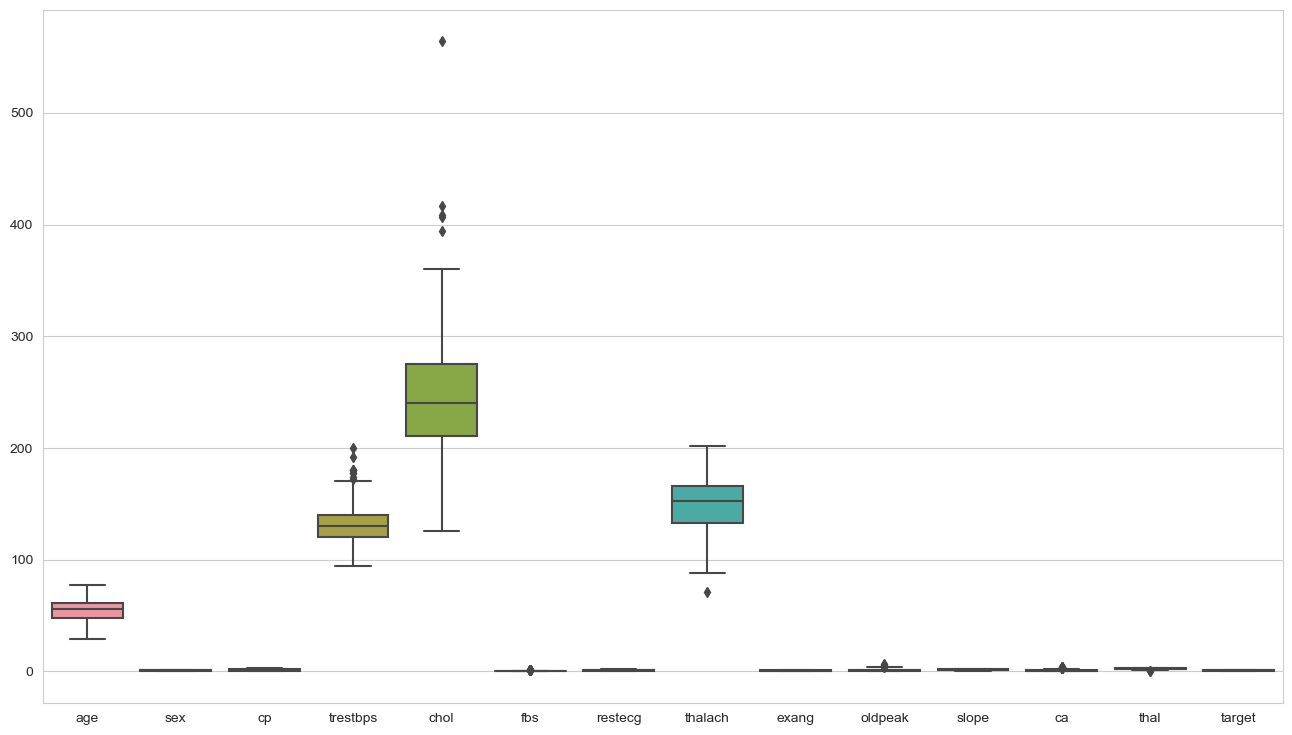

In [15]:
# Visualizo em grafico os outilers

plt.figure(figsize = (16,9))
sns.boxplot(data = hd)

In [16]:
# Visualizo novamente a descrição e foco nas colunas com outliers

hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
# Visualizo agora como ficaria com -1% 

hd['trestbps'].quantile(0.99)

180.0

<Axes: >

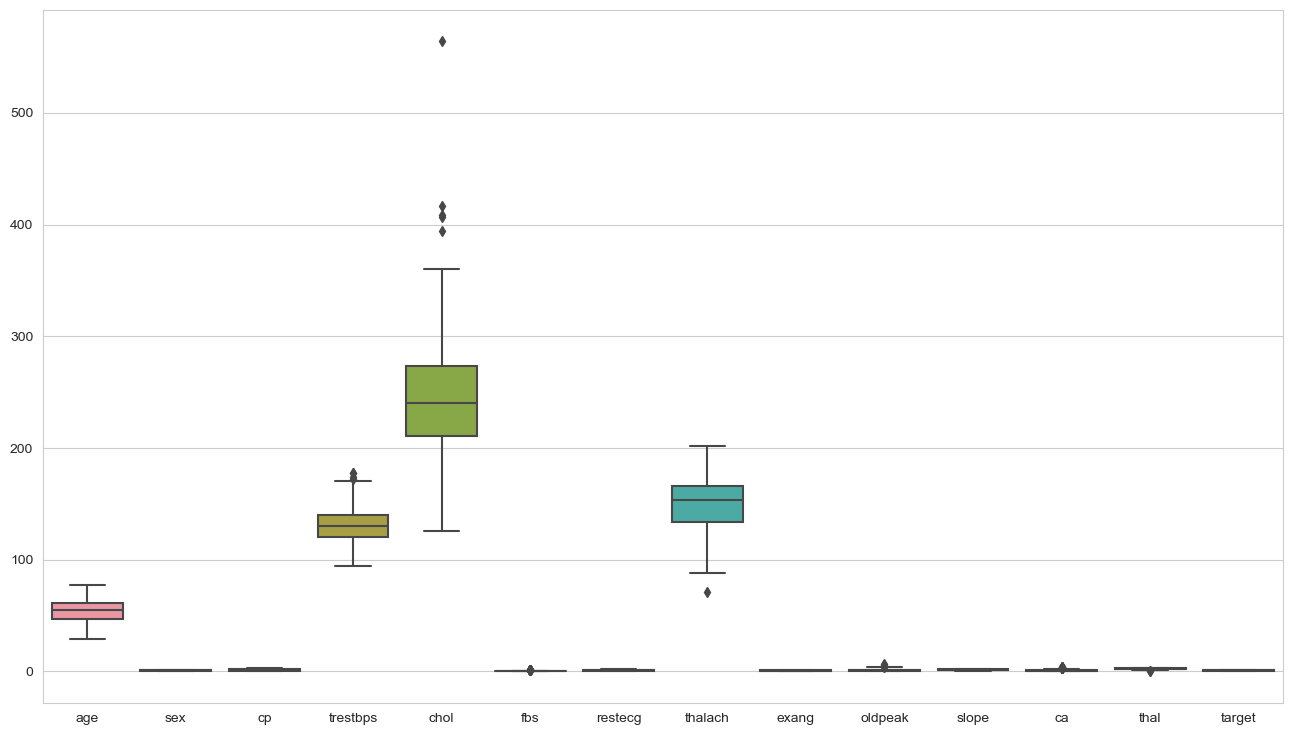

In [18]:
# -1% no momento é uma remoção ok então crio um novo hd com -1% e um grafico com o novo hd 
# Caso seja preciso eu mantenho meu hd original com "vida"

hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile(0.99)]
plt.figure(figsize = (16,9))
sns.boxplot(data = hd1)

In [19]:
# Visualizo o novo hd chamado hd1
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Agora o mesmo processo para com outro outlier, aqui (Nesse caso) eu estou fazendo separado mas sim poderia fazer tudo em uma unica linha

In [20]:
# Visualizo agora como ficaria com -1% a coluna "chol"

hd1['chol'].quantile(0.98)


354.4799999999999

<Axes: >

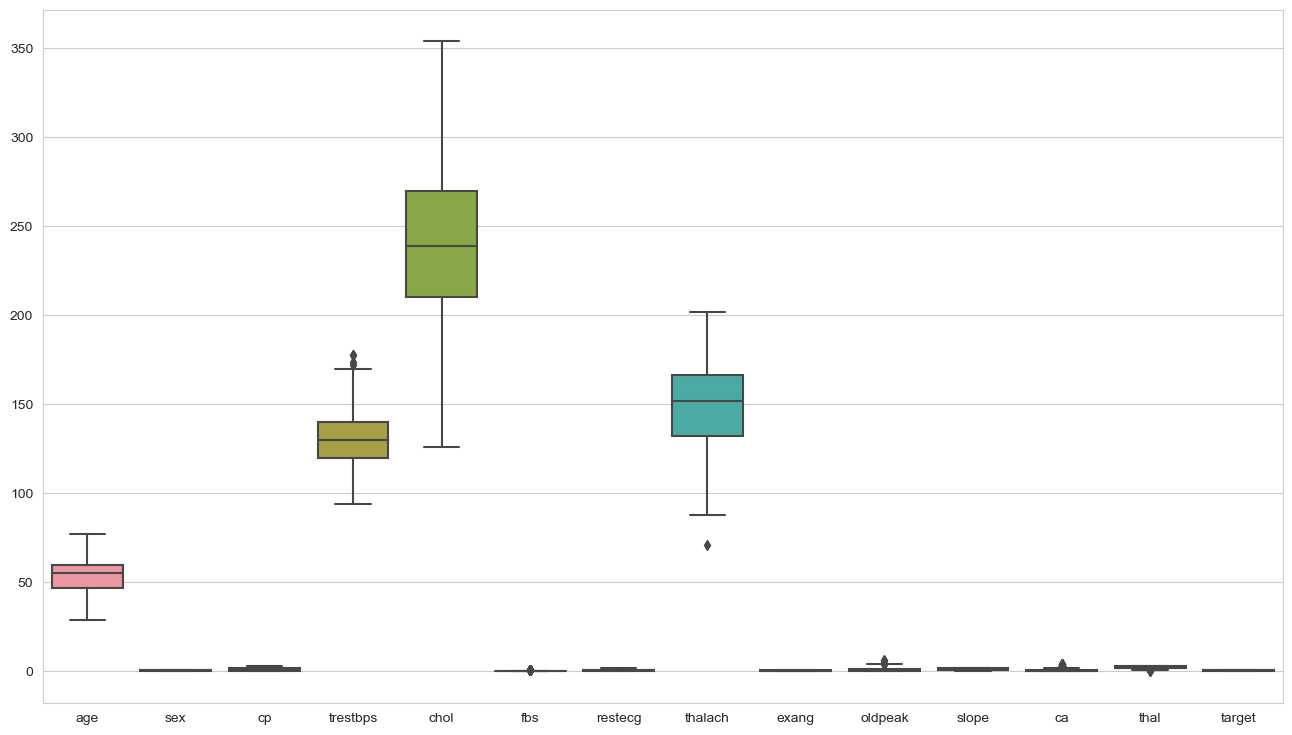

In [21]:
# -1% no momento  naõ foi uma remoção ok então diminui para -2% um novo hd com -2% e um grafico com o novo hd 
# Caso seja preciso eu mantenho meu hd original com "vida" 

hd2 = hd1[hd1['chol'] < hd1['chol'].quantile(0.98)]
plt.figure(figsize = (16,9))
sns.boxplot(data = hd2)

In [22]:
# Visualizo o novo hd chamado hd2
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###### Antes a remossão era para - % e agora na coluna "thalach" é preciso fazer o inverso vamos ver na sequencia como vai ficar...

In [23]:
hd2['thalach'].quantile(0.005)

88.9

<Axes: >

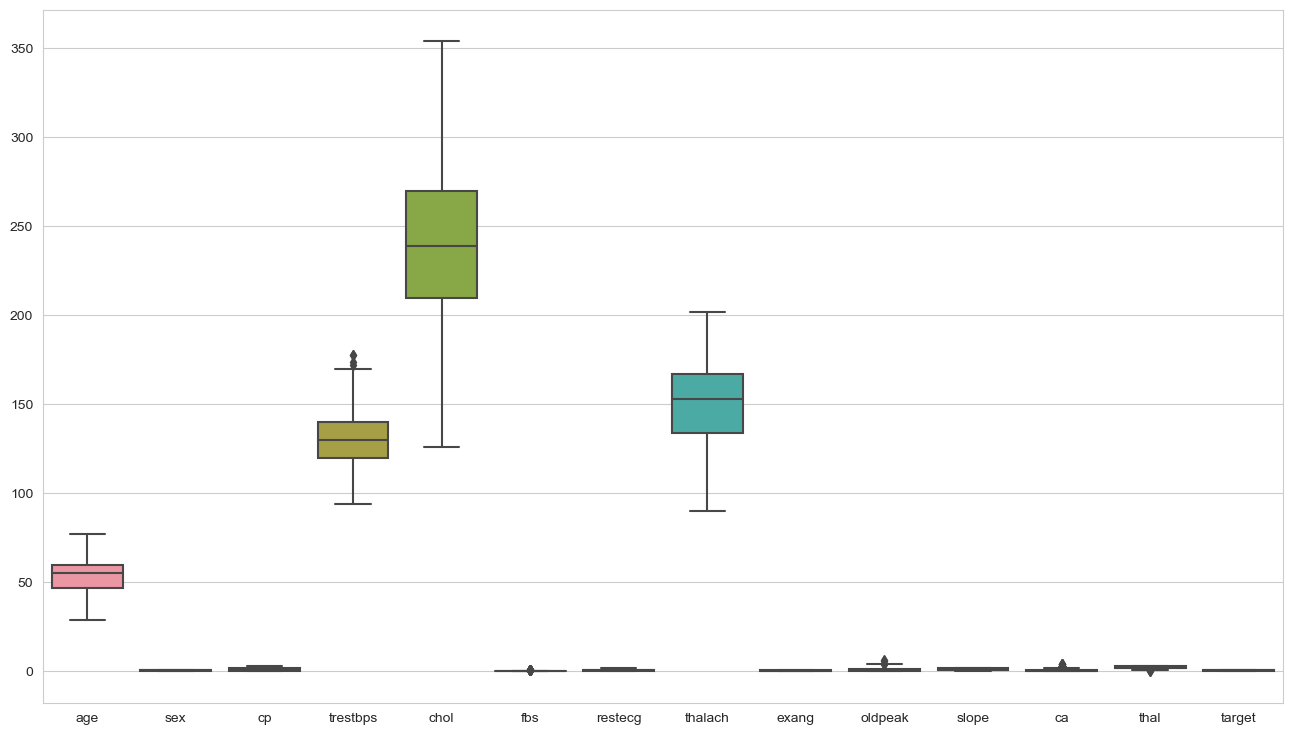

In [24]:
# Agora foi acrescentado um valor de 0.005% para remoção do outlier, em seguida carregamos a visualização
# Caso seja preciso eu mantenho meu hd original com "vida" 

hd3 = hd2[hd2['thalach'] > hd2['thalach'].quantile(0.005)]
plt.figure(figsize = (16,9))
sns.boxplot(data = hd3)

In [25]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


---

### Com a limpeza pronta vamos preparar um novo hd para começar a trabalhar nosso modelo

In [26]:
#categoricas = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
#numericas = ['age','trestbps','chol','thalach','oldpeak']

In [27]:
# Agora "transformamos nossas colunas em 0 e 1"

hd4 = pd.get_dummies(hd3, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [28]:
# Crio a separação do target 

X = hd4.drop('target', axis = 1 )
y = hd4['target']

In [29]:
# Com base na separação criamos nosso X e y treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Iniciamos nosso modelo 1°
###### Importrando varias bibliotecas por isso esse sera o 1° modelo

In [30]:
# Escolho o 1° algoritimo, mudo a interação padrão do modelo de 100 para 2000 por que 100 reflete um erro

log = LogisticRegression(max_iter = 2000)

In [31]:
# Treino o algoritimo com os conjuntos de Treino 
# È gerado um aviso sobre a função max_inter

log.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [32]:
# Agora visualizo a acuracia do modelo com os conjutos de treino

log.score(X_train, y_train)

0.8744588744588745

In [33]:
# Agora visualizo a acuracia do modelo com os conjutos de teste

log.score(X_test, y_test)

0.8448275862068966

In [34]:
# Ja tenho a previsão com X_teste

y_previsto = log.predict(X_test)

In [35]:
# Uma segunda forma de visualizar o resultatdo

accuracy_score(y_test, y_previsto)

0.8448275862068966

In [36]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [37]:
confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]], dtype=int64)

---

#### Tenho o resultado com esse modelo visualizando o que eles tinham como alvo, feito isso agora vou criar uma função onde posso passar vários modelos sem precisar criar todo um script para cada modelo

In [38]:
def relatorio_ml(df, algoritimo, opt = 2):
    X = df.drop('target', axis = 1 )
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if opt == 0:
        ml = algoritimo(max_iter = 2000)
    elif opt == 1:
        ml = algoritimo(n_estimators = 2000)
    elif opt == 2:
        ml = algoritimo()
            
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acuracia treino: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acuracia treino: {score_test * 100:.2f}%")
        
    y_previsto = log.predict(X_test)
    print("--- CLASSIFICATION REPORT ---")
    print(classification_report(y_test, y_previsto))
    print("--- CONFUSION MATRIX ---")
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Oranges')
        
    return score_train, score_test

Acuracia treino: 87.45%
Acuracia treino: 84.48%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


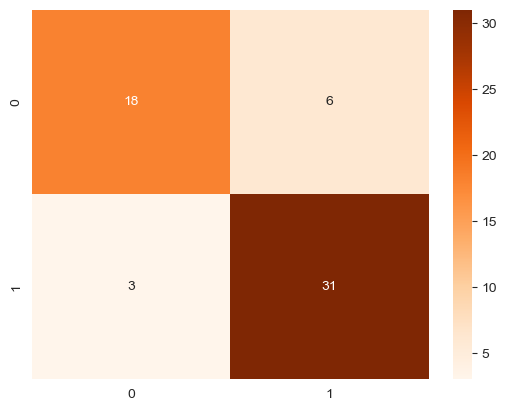

In [39]:
# Utilizando o mesmo modelo LogisticRegression testando a função

log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt = 0)

Acuracia treino: 100.00%
Acuracia treino: 72.41%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


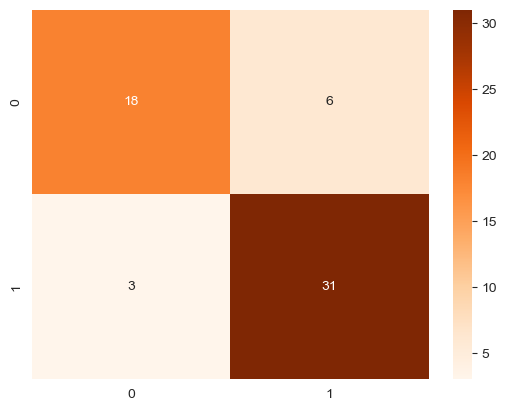

In [40]:
# Utilizando um modelo diferente testando a função

tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)

Acuracia treino: 93.51%
Acuracia treino: 82.76%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


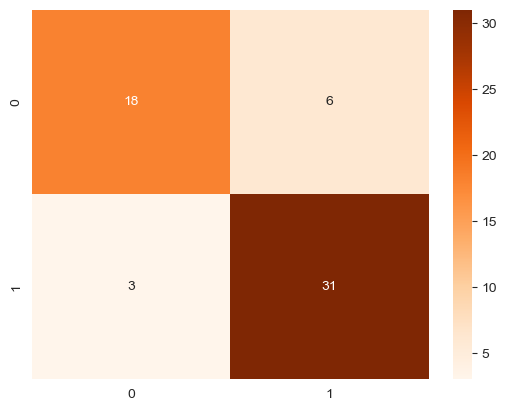

In [41]:
# Utilizando um modelo diferente testando a função

ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier)

Acuracia treino: 77.06%
Acuracia treino: 60.34%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


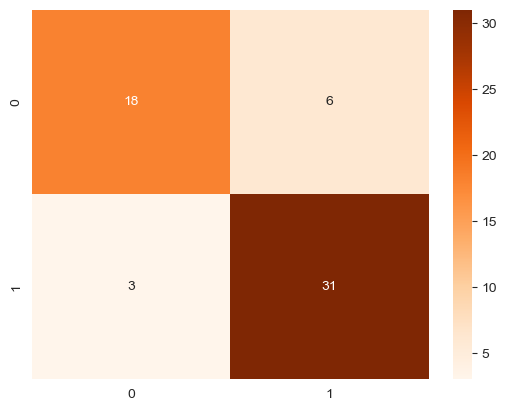

In [42]:
# Utilizando um modelo diferente testando a função

kn_train, kn_test = relatorio_ml(hd4, KNeighborsClassifier)

Acuracia treino: 100.00%
Acuracia treino: 79.31%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


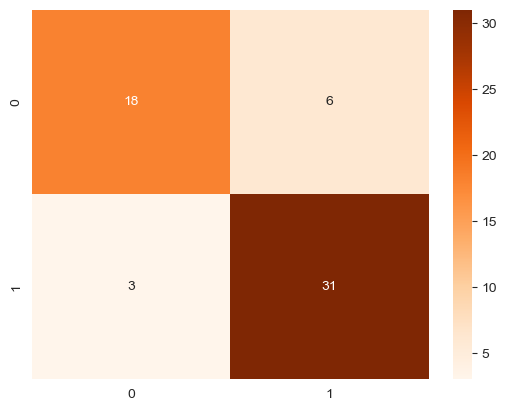

In [43]:
# Utilizando um modelo diferente testando a função

rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

In [44]:
# Crio uma tabela onde pode-se comparar a eficiencia de cada modelo.

data = {'Modelos':['Logistic Regression', 'Decision Tree ', 'Ada Boost ','KNeighbors','Random Forest'],
       'Acurácia Treino': [round(log_train *100, 2), round(tree_train *100, 2), round(ada_train *100, 2),
                          round(kn_train *100, 2), round(rand_train *100, 2)],
       'Acurácia Teste': [round(log_test *100, 2), round(tree_test *100, 2), round(ada_test *100, 2),
                          round(kn_test *100, 2), round(rand_test *100, 2)],
       }
df1 = pd.DataFrame(data)
df1.sort_values(by='Acurácia Teste', ascending = False, inplace = True)
df1

,Modelos,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
2,Ada Boost,93.51,82.76
4,Random Forest,100.00,79.31
1,Decision Tree,100.00,72.41
3,KNeighbors,77.06,60.34


In [45]:
# "Sensibilizando o modelo"

def relatorio_ml_scaler(df, algoritimo, opt = 2):
    X = df.drop('target', axis = 1 )
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    cols_scalers = ['age','trestbps','chol','thalach','oldpeak']
    X_train[cols_scalers] = scaler.fit_transform(X_train[cols_scalers])
    X_test[cols_scalers] = scaler.transform(X_test[cols_scalers])
    
    if opt == 0:
        ml = algoritimo(max_iter = 2000)
    elif opt == 1:
        ml = algoritimo(n_estimators = 2000)
    elif opt == 2:
        ml = algoritimo()
            
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acuracia treino: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acuracia treino: {score_test * 100:.2f}%")
        
    y_previsto = log.predict(X_test)
    print("--- CLASSIFICATION REPORT ---")
    print(classification_report(y_test, y_previsto))
    print("--- CONFUSION MATRIX ---")
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Oranges')
        
    return score_train, score_test

Acuracia treino: 87.45%
Acuracia treino: 84.48%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


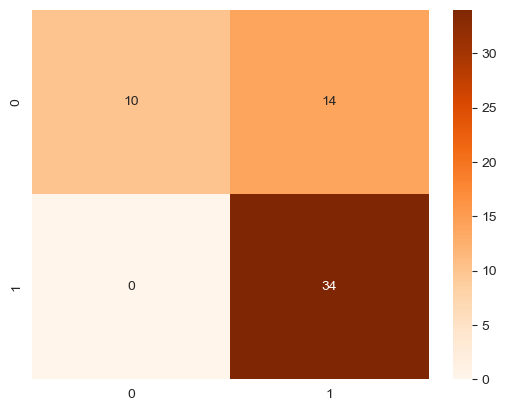

In [46]:
# Utilizando o mesmo modelo LogisticRegression testando a função

log_train_scaler, log_test_scaler = relatorio_ml_scaler(hd4, LogisticRegression, opt = 0)

Acuracia treino: 100.00%
Acuracia treino: 74.14%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


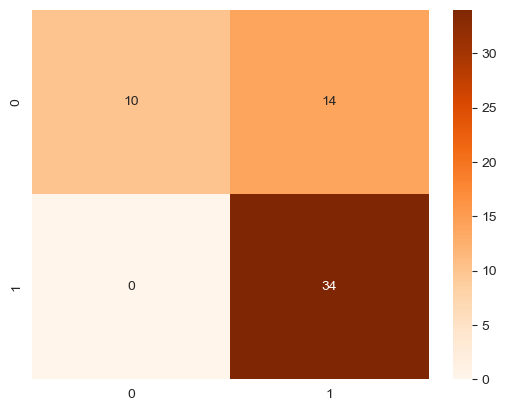

In [47]:
# Utilizando um modelo diferente testando a função

tree_train_scaler, tree_test_scaler = relatorio_ml_scaler(hd4, DecisionTreeClassifier)

Acuracia treino: 93.51%
Acuracia treino: 82.76%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


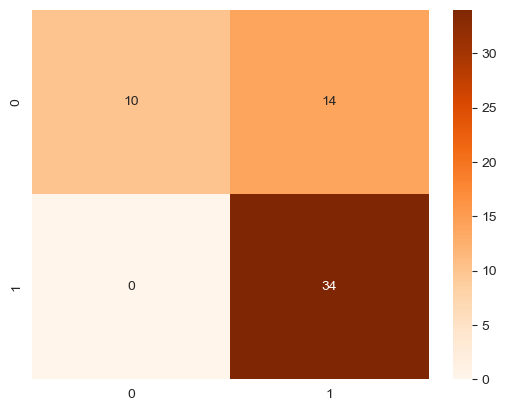

In [48]:
# Utilizando um modelo diferente testando a função

ada_train_scaler, ada_test_scaler = relatorio_ml_scaler(hd4, AdaBoostClassifier)

Acuracia treino: 87.45%
Acuracia treino: 79.31%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


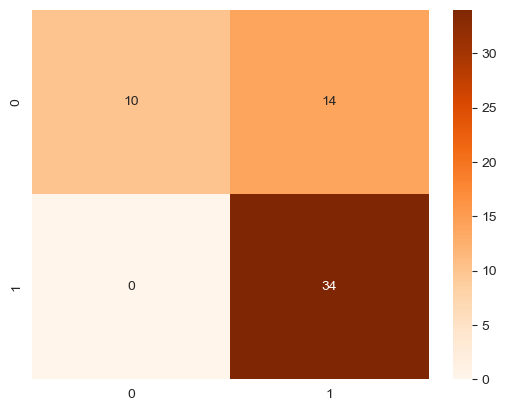

In [49]:
# Utilizando um modelo diferente testando a função

kn_train_scaler, kn_test_scaler = relatorio_ml_scaler(hd4, KNeighborsClassifier)

Acuracia treino: 100.00%
Acuracia treino: 77.59%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION MATRIX ---


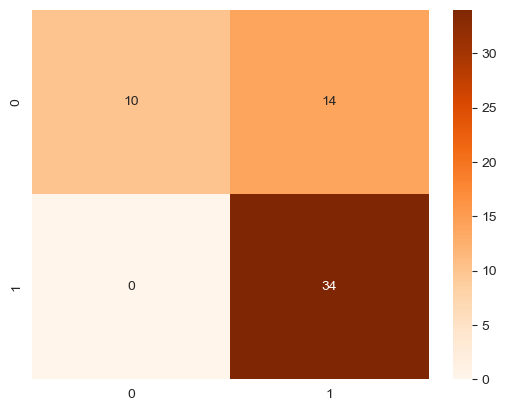

In [50]:
# Utilizando um modelo diferente testando a função

rand_train_scaler, rand_test_scaler = relatorio_ml_scaler(hd4, RandomForestClassifier)

In [51]:
# Crio uma tabela onde pode-se comparar a eficiencia de cada modelo sensibilizado

data = {'Modelos Scaler':['Logistic Regression', 'Decision Tree ', 'Ada Boost ','KNeighbors','Random Forest'],
       'Acurácia Treino Scaler': [round(log_train_scaler *100, 2), round(tree_train_scaler *100, 2), round(ada_train_scaler *100, 2),
                          round(kn_train_scaler *100, 2), round(rand_train_scaler *100, 2)],
       'Acurácia Teste Scaler': [round(log_test_scaler *100, 2), round(tree_test_scaler *100, 2), round(ada_test_scaler *100, 2),
                          round(kn_test_scaler *100, 2), round(rand_test_scaler *100, 2)],
       }
df2 = pd.DataFrame(data)
df2.sort_values(by='Acurácia Teste Scaler', ascending = False, inplace = True)

In [52]:
display(df1, df2)

,Modelos,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
2,Ada Boost,93.51,82.76
4,Random Forest,100.00,79.31
1,Decision Tree,100.00,72.41
3,KNeighbors,77.06,60.34


,Modelos Scaler,Acurácia Treino Scaler,Acurácia Teste Scaler
0,Logistic Regression,87.45,84.48
2,Ada Boost,93.51,82.76
3,KNeighbors,87.45,79.31
4,Random Forest,100.00,77.59
1,Decision Tree,100.00,74.14
